# 小作业2
开始前的准备

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
from patsy import bs, dmatrix
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 问题1：从$Normal(0, 1)$分布（均值为0，标准差为1的正态分布）中随机生成200个样本，并对该生成样本进行可视化。

### 问题描述：本题考查能否从确定的正态分布总体中进行抽样。我们可以使用scipy的stats模块中生成一些人工数据样本，然后在后续的题目中使用PyMC3尝试恢复相应的参数。

通过使用python的科学计算库scipy，我们可以通过指定均值，标准差以及数量来生成服从正态分布的随机数。

**步骤1**:使用scipy中的stats.norm通过设定loc（均值）和scale（标准差）参数，并使用rvs从设定的正态分布中抽取200个随机样本

In [2]:
######请你根据题目信息将...更改为特定的值#######
y_obs1 = stats.norm(loc = 0, scale = 1).rvs(size = 200)
#通过改变loc参数可以为正态分布的均值，scale参数设定标准差，rvs中的size设定生成数值数量
#可以参考scipy官方文档：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

**步骤2**:使用plt.hist函数通过将生成样本的名称输入到x参数中获得频数图

(array([0.03688025, 0.04610032, 0.18440127, 0.35036241, 0.42412291,
        0.38724266, 0.29504203, 0.08298057, 0.00922006, 0.02766019]),
 array([-2.65897127, -2.11667564, -1.57438002, -1.0320844 , -0.48978878,
         0.05250685,  0.59480247,  1.13709809,  1.67939371,  2.22168934,
         2.76398496]),
 <BarContainer object of 10 artists>)

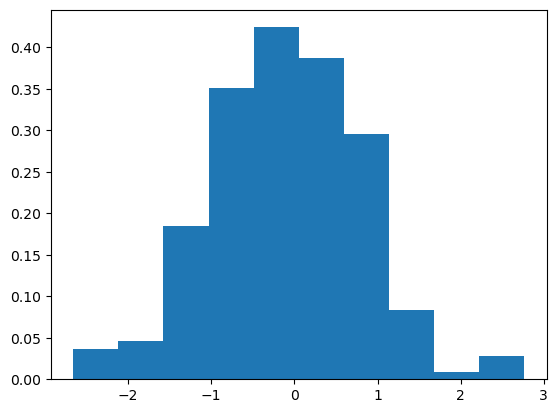

In [3]:
######请你将...替换为之前生成的样本的名称进行可视化###
plt.hist(x=y_obs1, density=True)
#x参数：输入值，这需要单个数组或不需要具有相同长度的数组序列
#density参数：如果为True，绘制并返回概率密度：每个 bin 将显示 bin 的原始计数除以计数总数和 bin 宽度

## 问题2：请你将先验设定为$\mu \sim Normal(0, 20)$（均值为0，标准差为20的正态分布），并将噪音的先验设定为$\sigma\sim Uniform(0, 1)$ （$sigma$来自0到1的均匀分布），并将设定的先验进行可视化

### 问题描述：本题考查是否可以根据题目信息为模型设定相应的先验，并检查先验的设定是否合理。先验分布（ 简称先验，prior ） 表示在观测到数据之前参数的不确定性，了解模型假设并灵活调整这些假设是有优势的，而先验是假设的形式之一，在建立模型时首先要为模型设定合适的先验。

我们先调用pm.Normal构造函数来创建一个服从正态分布的随机变量，作为正态先验使用。第一个参数是随机变量的名字。剩下的必要参数是参数，在这里是mu，平均数，和sd，标准差。然后调用pm.Uniform函数创建一个均匀分布的随机变量。在实践中，当做出先验假设后，无需以观测数据为条件，就可以通过从模型中采样来获得先验预测分布（ Prior Predictive Distribution ）并对采样结果进行可视化。

**步骤1**:先定义一个新的模型对象，并使用pm.Normal函数为mu定义一个正态分布的先验

In [4]:
with pm.Model() as model1:#定义了一个新的模型对象，这个对象是模型中随机变量的容器，将后面定义的变量都加入到这个模型里
    mu1 = pm.Normal("mu1", mu=0, sigma=20)#通过pm.Normal函数定义具有正态分布先验的随机变量
    #请你根据题目信息为参数mu和sigma选择数值

**步骤2**:请你根据题目信息继续使用pm.Uniform函数为sigma定义一个具有均匀分布的先验

In [5]:
with model1:#定义了一个新的模型对象，这个对象是模型中随机变量的容器，将后面定义的变量都加入到这个模型里
    sigma1 = pm.Uniform("sigma1", lower=0, upper=1)#通过pm.Normal函数定义具有正态分布先验的随机性随机变量
    #请你根据题目信息为参数mu和sigma选择数值

**步骤3**:请你对已经定义的先验进行抽样

In [6]:
with model1:
    prior_predictive1 = pm.sample_prior_predictive(samples=50)#通过使用pm.sample_prior_predictive函数对已经定义的先验进行抽样
    #参考链接：https://docs.pymc.io/en/latest/api/generated/pymc.sample_prior_predictive.html
    #将抽样的结果命名为prior_predictive

步骤4:请你对先验抽样结果进行可视化

<AxesSubplot:>

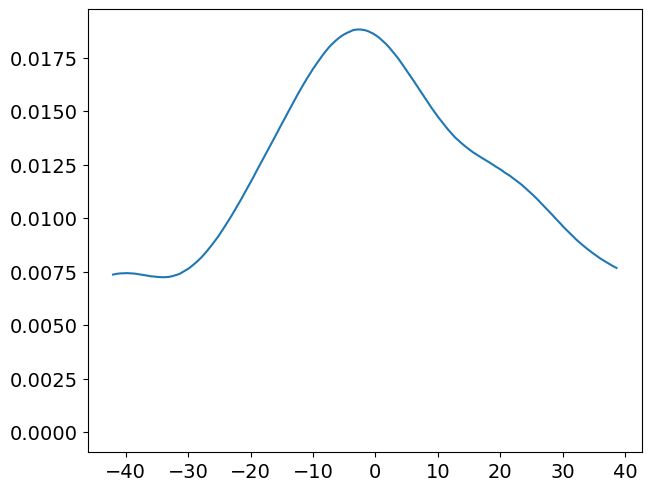

In [7]:
az.plot_dist(prior_predictive1["mu1"])#请你将...替换为之前定义均值的先验
#参考链接：https://python.arviz.org/en/latest/api/generated/arviz.plot_dist.html

<AxesSubplot:>

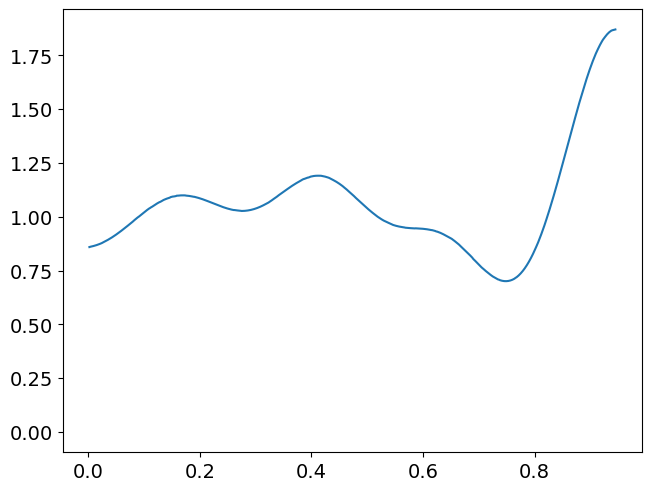

In [8]:
az.plot_dist(prior_predictive1["sigma1"])#请你将...替换为之前定义的sigma先验

## 问题3：请你根据问题2中设定的先验分布进行模型定义

### 问题描述：本题考查是否能够根据题目已知信息对模型进行定义。在设定先验变量后，就可以定义一个对数据结果分布抽样的变量y1。

y1是随机变量的一个特例，我们称之为观察随机变量，代表模型的数据可能性（似然）。它与标准的随机变量相同，除了它的观察参数（将数据传递给变量）表示这个变量的值是观察到的，并且不应该被应用于模型的任何拟合算法所改变

**步骤1**:定义一个确定随机变量（deterministic random variable），该变量的值由需要填写的参数确定。最后定义观测值用来表示模型数据的可能性（似然）。

In [9]:
with model1:#定义了一个新的模型对象，这个对象是模型中随机变量的容器，将后面定义的变量都加入到这个模型里
    # Y的观测值，这是一个特殊的观测随机变量，表示模型数据的可能性。也可以表示模型的似然，通过 observed 参数来告诉这个变量其值是已经被观测到了的，不会被拟合算法改变
    y1 = pm.Normal("y1", mu=mu1, sigma=sigma1, observed=y_obs1)#请你将...更换为之前在题目2中定义的均值和标准差的先验，并将在题目1生成的数据填写在在observed

## 问题4：请你将后验与生成样本的参数进行比较

### 问题描述：本题考查是否可以根据之前模型设定进行mcmc采样，并展示了各参数的分布(后验)情况


**步骤1**: 从后验分布中进行采样

In [10]:
with model1:#定义了一个新的模型对象，这个对象是模型中随机变量的容器，将后面定义的变量都加入到这个模型里
    trace1 = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2,return_inferencedata=True)#从后验分布中进行采样,需要使用采样的函数：https://docs.pymc.io/en/latest/api/generated/pymc.sample.html
#从后验分布进行采样是请你通过设置draw和chains参数使正式样本的数量为25每条链，共两条链


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma1, mu1]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 644 seconds.


**步骤2**:使用arviz包对后验的采样结果进行统计汇总分析,并与问题1中所设定的生成样本参数$Normal(0,1)$进行对比，查看是否相似

In [11]:
az.summary(trace1, var_names=["mu1", "sigma1"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu1,-0.095,0.066,-0.214,0.034,0.001,0.001,2053.0,2080.0,1.0
sigma1,0.910,0.043,0.831,0.988,0.001,0.001,1093.0,750.0,1.0


In [12]:
#这部分是对观测值（生成样本）进行描述统计，请你将...替换为题目1中定义的生成数据名称
mean = np.mean(y_obs1)
sd = np.std(y_obs1)
 
print("Descriptive analysis")
print("Mean =", mean)
print("SD =", sd)

Descriptive analysis
Mean = -0.09505053783357034
SD = 0.907077629234304


## 问题5：请你将后验与生成样本的模型参数进行可视化比较

### 问题描述：本问题是为了考查是否掌握使用可视化的方法评估后验与生成数据的模型参数的接近程度

**步骤1**：计算后验预测分布

In [13]:
with model1:
    #pm.sample_posterior_predictive()利用trace.posterior的后验分布计算后验预测分布
    ppc_y1 = pm.sample_posterior_predictive(trace1.posterior, var_names=["mu1", "sigma1", "y1"]) #这里需要你填写采样结果

**步骤2**:对后验预测分布进行可视化

<AxesSubplot:xlabel='y1'>

D:\ANACONDA3\envs\r_tutorial\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


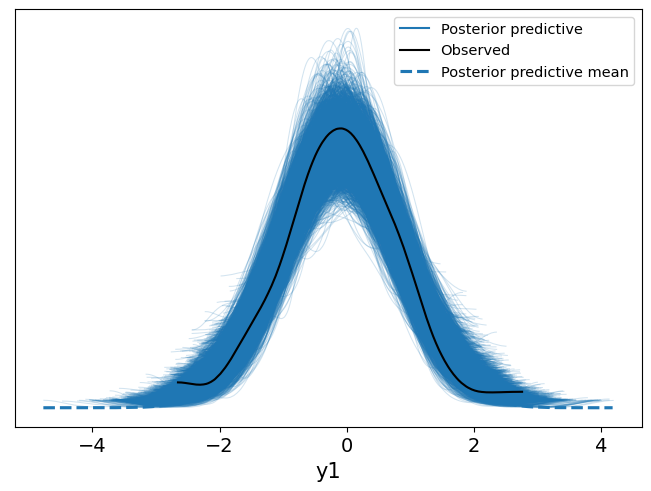

In [14]:
az.plot_ppc(az.from_pymc3(posterior_predictive=ppc_y1, model=model1))#这里需要你填写上一步骤的后验预测分布

**步骤3**:参数恢复

In [16]:
with pm.Model() as model_recovery:
    mu_r = pm.Normal("mu_r", mu=0, sigma=20)#通过pm.Normal函数定义具有正态分布先验的随机变量
    sigma_r = pm.Uniform("sigma_r", lower = 0, upper=1)#通过pm.Normal函数定义具有正态分布先验的随机性随机变量)
    y_r = pm.Normal("y_r", mu=mu_r, sigma=sigma_r, observed=ppc_y1["y1"])
    #从后验分布中进行采样,需要使用采样的函数：https://docs.pymc.io/en/latest/api/generated/pymc.sample.html     
    trace_r =  pm.sample(draws = 10, tune=5, target_accept=0.9,chains=2, cores= 2, return_inferencedata=True)
    #从后验分布进行采样是请你通过设置draw和chains参数使正式样本的数量为25每条链，共两条链
    posterior_predictive_r = pm.sample_posterior_predictive(trace_r, var_names=["mu_r", "sigma_r", "y_r"])
   

Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_r, mu_r]


Sampling 2 chains for 5 tune and 10 draw iterations (10 + 20 draws total) took 3545 seconds.
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\pymc3\sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.9. Try to increase the number of tuning steps.
The chain contains only diverging samples. The model is probably misspecified.
The acceptance probability does not match the target. It is 0.0, but should be close to 0.9. Try to increase the number of tuning steps.


In [18]:
az.summary(trace_r, var_names=["mu_r", "sigma_r"])

D:\ANACONDA3\envs\r_tutorial\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: divide by zero encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_r,0.143,0.236,-0.087,0.373,0.106,0.080,5.0,5.0,inf
sigma_r,0.503,0.225,0.284,0.723,0.101,0.076,5.0,5.0,inf


对后验分布进行可视化以及与生成数据的参数进行比较

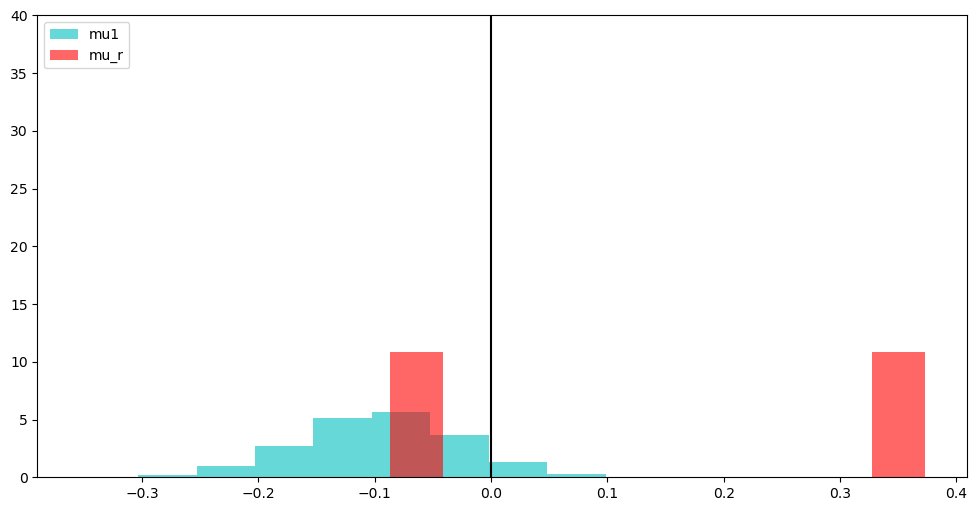

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(ppc_y1["mu1"], label="mu1", color = "c", 
density = True, alpha=0.6)#这里填写model1后验均值
plt.hist(posterior_predictive_r["mu_r"], label="mu_r", color = "r", 
density = True, alpha=0.6)#这里填写model_recovery后验均值0
plt.vlines(0, 0, 40, colors="black")
plt.ylim(0, 40)
plt.legend(loc="upper left")
plt.show()

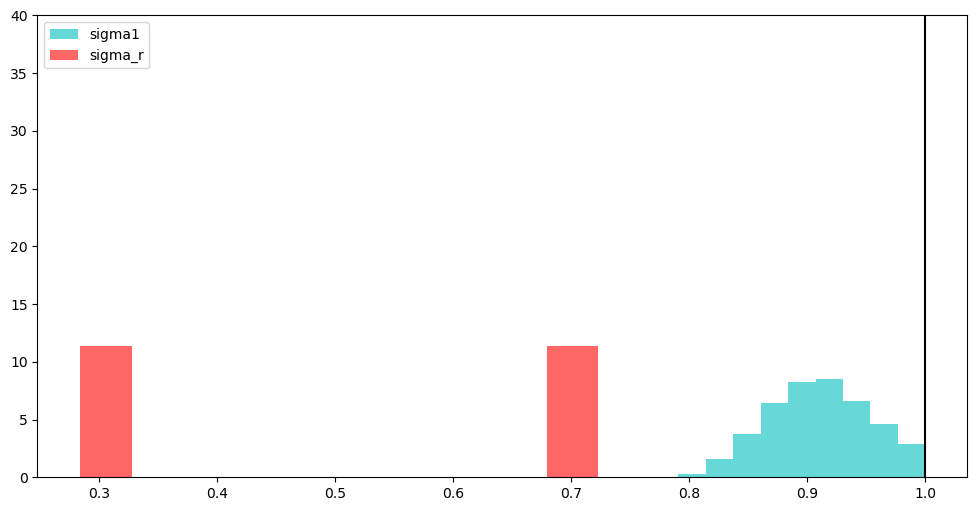

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(ppc_y1["sigma1"], label="sigma1", color = "c", 
density = True, alpha=0.6)
plt.hist(posterior_predictive_r["sigma_r"], label="sigma_r", color = "r", 
density = True, alpha=0.6)
plt.vlines(1, 0, 40, colors="black")
plt.ylim(0, 40)
plt.legend(loc="upper left")
plt.show()

## 问题6：请你更换需要估计参数的先验并按照之前的步骤重新计算后验并与样本比较
### 问题描述：本题考查是否可以对先验进行更新以及是否掌握之前的步骤。

**步骤1**:请你先定义一个新的模型对象model2，并使用pm.Normal函数为mu更换一个先验

In [21]:
with pm.Model() as model2:#定义了一个新的模型对象，这个对象是模型中随机变量的容器，将后面定义的变量都加入到这个模型里
    mu2 = pm.Normal("mu2", mu=10, sigma=100)#通过pm.Normal函数定义具有正态分布先验的随机变量

**步骤2**：请你使用pm.Uniform函数为sigma选择一个先验

In [22]:
with model2:
    sigma2 = pm.Uniform("sigma2", lower=0, upper=100)#通过pm.Normal函数定义具有正态分布先验的随机性随机变量


**步骤3**:请你根据问题2中设定的先验分布进行模型定义

In [23]:
with model2:
    #observed参数表示这个变量的值是已经被观测到的，也就是这部分需要填写题目1中生成的样本
    y2 = pm.Normal("y2", mu=mu2, sigma=sigma2, observed=y_obs1)

**步骤4**:请你对后验分布进行采样

In [24]:
with model2:
    trace2_for_comp = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2)
    trace2 = az.from_pymc3(trace2_for_comp)#从后验分布中进行采样,需要使用采样的函数：https://docs.pymc.io/en/latest/api/generated/pymc.sample.html
    #从后验分布进行采样是请你通过设置draw和chains参数使正式样本的数量为25每条链，共两条链

C:\Users\star CR\AppData\Local\Temp\ipykernel_15144\1275887625.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace2_for_comp = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multip

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 521 seconds.


**步骤5**:使用arviz包对后验的采样结果进行统计汇总分析,并与问题1中所设定的生成样本参数$Normal(0,1)$进行对比，查看是否相似。并对后验预测分布进行可视化。

In [26]:
with model2:
    #pm.sample_posterior_predictive()利用trace.posterior的后验分布计算后验预测分布
    ppc_y2 = pm.sample_posterior_predictive(trace2.posterior, var_names=["mu2", "sigma2", "y2"]) 
    #将pymc3 数据转换为 InferenceData 对象。
    ppc_data2 = az.from_pymc3(trace = trace2_for_comp, posterior_predictive=ppc_y2)

In [27]:
az.summary(trace2,var_names=["mu2", "sigma2"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu2,-0.094,0.067,-0.218,0.032,0.001,0.001,3161.0,2573.0,1.0
sigma2,0.916,0.046,0.828,1.001,0.001,0.001,3315.0,2698.0,1.0


<AxesSubplot:xlabel='y2'>

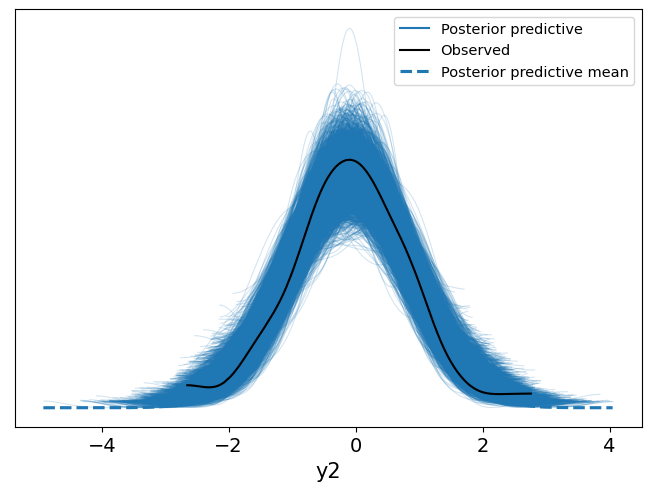

In [30]:
az.plot_ppc(ppc_data2)

## 问题7：请你从从$Normal(10, 1)$分布（均值为10，标准差为1的正态分布）中随机生成200个样本，并重复之前问题1至问题5的步骤。

**步骤1**:使用scipy中的stats.norm通过设定loc（均值）和scale（标准差）参数，并使用rvs从设定的正态分布中抽取200个随机样本

In [32]:
y_obs2 = stats.norm(loc = 10, scale = 1).rvs(size = 200)

**步骤2**:使用plt.hist函数通过将生成样本的名称输入到x参数中获得频数图

(array([0.01791679, 0.04479199, 0.08958397, 0.23291833, 0.28666871,
        0.34937749, 0.34041909, 0.20604314, 0.15229275, 0.07166718]),
 array([ 6.91524416,  7.47337971,  8.03151527,  8.58965082,  9.14778637,
         9.70592193, 10.26405748, 10.82219304, 11.38032859, 11.93846415,
        12.4965997 ]),
 <BarContainer object of 10 artists>)

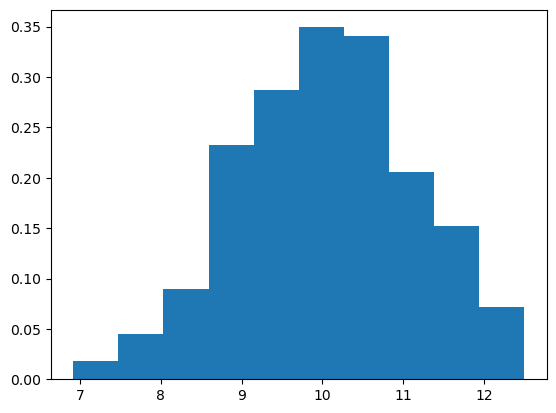

In [33]:
plt.hist(x=y_obs2, density=True)

**步骤3**:请你生成一个模型对象，将mu的先验设定为$\mu \sim Normal(10, 20)$，噪音的先验设定为$\sigma \sim Uniform(0,30)$，并将设定的先验进行可视化

In [34]:
with pm.Model() as model3:#定义了一个新的模型对象，这个对象是模型中随机变量的容器，将后面定义的变量都加入到这个模型里
    mu3 = pm.Normal("mu3", mu=10, sigma=20)#通过pm.Normal函数定义具有正态分布先验的随机变量

In [35]:
with model3:
    sigma3 = pm.Uniform("sigma3", lower=0, upper=30)#通过pm.Normal函数定义具有正态分布先验的随机性随机变量

In [36]:
with model3:
    prior_predictive3 = pm.sample_prior_predictive(samples=50)

<AxesSubplot:>

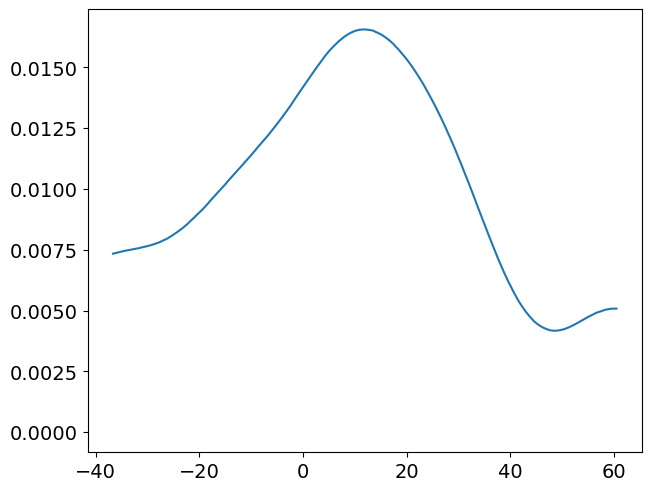

In [37]:
az.plot_dist(prior_predictive3["mu3"])

<AxesSubplot:>

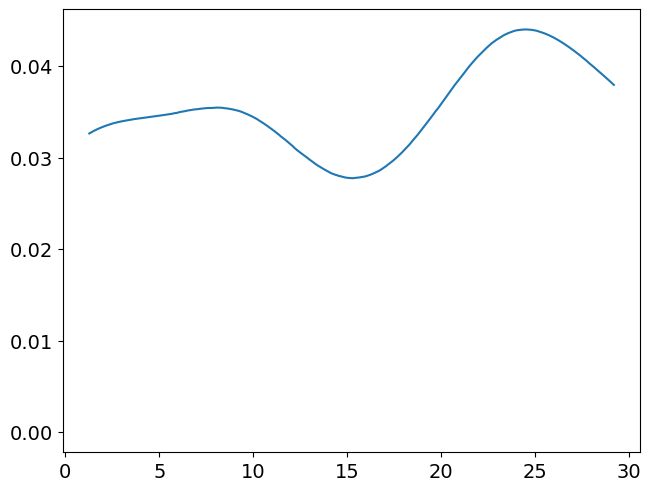

In [38]:
az.plot_dist(prior_predictive3["sigma3"])

步骤4:请你根据设定的先验进行模型定义

In [39]:
with model3:
    y3 = pm.Normal("y3", mu = mu3, sigma = sigma3, observed = y_obs2)

步骤5:请你生成后验，并将后验与生成样本的参数$Normal\sim (10, 1)$进行比较

In [46]:
with model3:#定义了一个新的模型对象，这个对象是模型中随机变量的容器，将后面定义的变量都加入到这个模型里
    trace3_for_comp = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2)#从后验分布中进行采样,需要使用采样的函数：https://docs.pymc.io/en/latest/api/generated/pymc.sample.html
    trace3=az.from_pymc3(trace3_for_comp)
    #从后验分布进行采样是请你通过设置draw和chains参数使正式样本的数量为25每条链，共两条链

C:\Users\star CR\AppData\Local\Temp\ipykernel_15144\1785846464.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace3_for_comp = pm.sample(draws = 2000, tune=1000, target_accept=0.9,chains=2, cores= 2)#从后验分布中进行采样,需要使用采样的函数：https://docs.pymc.io/en/latest/api/generated/pymc.sample.html
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: inval

Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 417 seconds.


In [47]:
az.summary(trace3_for_comp, var_names=["mu3", "sigma3"])

D:\ANACONDA3\envs\r_tutorial\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu3,10.020,0.077,9.879,10.164,0.001,0.001,3574.0,2841.0,1.0
sigma3,1.096,0.056,0.989,1.196,0.001,0.001,3111.0,2553.0,1.0


步骤6:请你将后验与生成样本进行可视化比较

In [48]:
with model3:
    #pm.sample_posterior_predictive()利用trace.posterior的后验分布计算后验预测分布
    ppc_y3 = pm.sample_posterior_predictive(trace3.posterior, var_names=["mu3", "sigma3", "y3"]) 
    #将pymc3 数据转换为 InferenceData 对象。
    ppc_data3 = az.from_pymc3(trace = trace3_for_comp, posterior_predictive=ppc_y3)

<AxesSubplot:xlabel='y3'>

D:\ANACONDA3\envs\r_tutorial\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


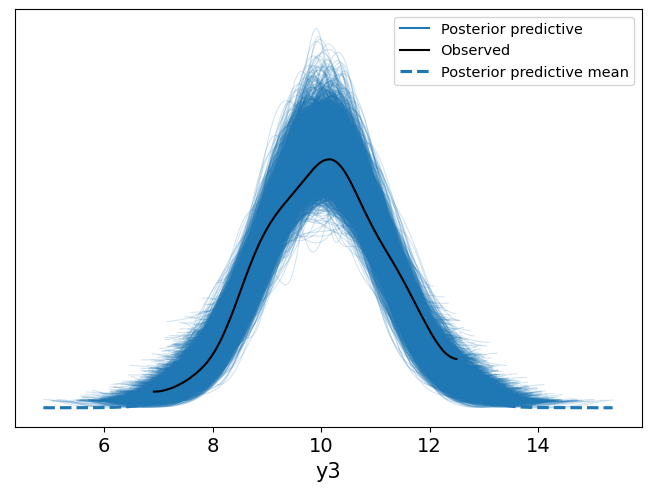

In [52]:
az.plot_ppc(ppc_data3)

In [53]:
with pm.Model() as model3_r:
    mu3_r = pm.Normal("mu3_r", mu=10, sigma=100)#通过pm.Normal函数定义具有正态分布先验的随机变量
    sigma3_r = pm.Uniform("sigma3_r", lower = 0, upper=30)#通过pm.Normal函数定义具有正态分布先验的随机性随机变量)
    y3_r = pm.Normal("y3_r", mu=mu3_r, sigma=sigma3_r, observed=ppc_y3["y3"])
    #从后验分布中进行采样,需要使用采样的函数：https://docs.pymc.io/en/latest/api/generated/pymc.sample.html     
    trace3_r = pm.sample(draws = 10, tune=5, target_accept=0.9,chains=2, cores= 2, return_inferencedata=True)
    #从后验分布进行采样是请你通过设置draw和chains参数使正式样本的数量为25每条链，共两条链
    posterior_predictive_3r = pm.sample_posterior_predictive(trace3_r, var_names=["mu3_r", "sigma3_r", "y3_r"])   

Only 10 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma3_r, mu3_r]


Sampling 2 chains for 5 tune and 10 draw iterations (10 + 20 draws total) took 1385 seconds.
D:\ANACONDA3\envs\r_tutorial\lib\site-packages\pymc3\sampling.py:643: UserWarning: The number of samples is too small to check convergence reliably.
  warnings.warn("The number of samples is too small to check convergence reliably.")
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 5.826908788412141e-290, but should be close to 0.9. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 1.2360166030953495e-284, but should be close to 0.9. Try to increase the number of tuning steps.


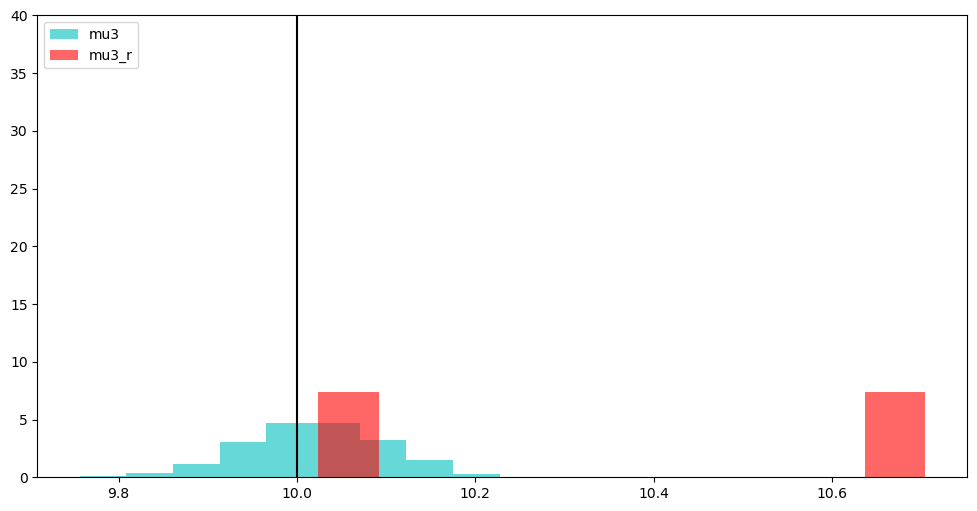

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(ppc_y3["mu3"], label="mu3", color = "c", 
density = True, alpha=0.6)
plt.hist(posterior_predictive_3r["mu3_r"], label="mu3_r", color = "r", 
density = True, alpha=0.6)
plt.vlines(10, 0, 40, colors="black")
plt.ylim(0, 40)
plt.legend(loc="upper left")
plt.show()

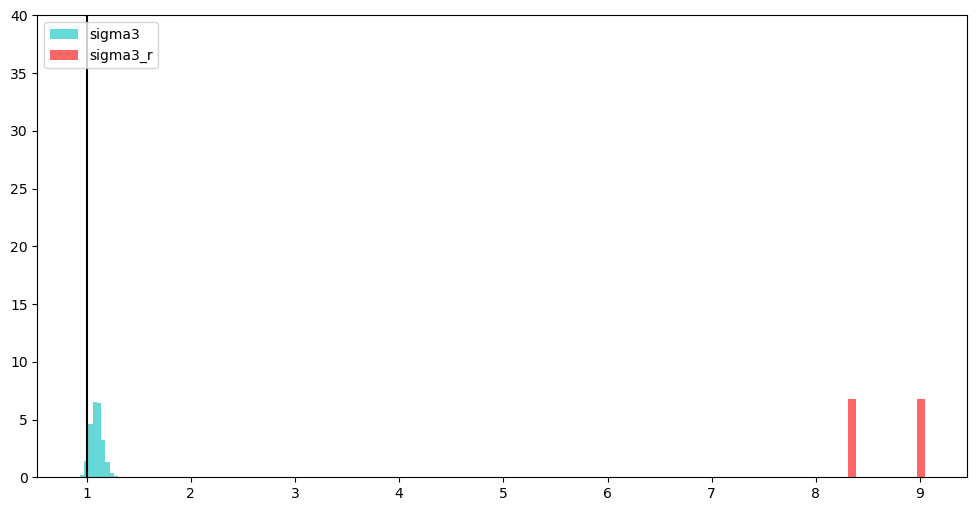

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(ppc_y3["sigma3"], label="sigma3", color = "c", 
density = True, alpha=0.6)
plt.hist(posterior_predictive_3r["sigma3_r"], label="sigma3_r", color = "r", 
density = True, alpha=0.6)
plt.vlines(1, 0, 40, colors="black")
plt.ylim(0, 40)
plt.legend(loc="upper left")
plt.show()